In [10]:
import numpy as np

# 信号生成
N = 1000
x1 = np.random.randn(N, 1)  # ランダム信号 x1
x2 = np.random.randn(N, 1)  # ランダム信号 x2

# 直流成分を除去
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

# 区間分割
n_segments = 10  # 区間数
segment_length = N // n_segments  # 各区間の長さ

# 各区間のパワーを計算
power_diff = []  # パワーの差を保存するリスト
for i in range(n_segments):
    # 各区間のインデックス範囲
    start = i * segment_length
    end = start + segment_length
    
    # 区間の信号
    x1_segment = x1[start:end]
    x2_segment = x2[start:end]
    
    # パワー計算 (平均二乗値)
    power_x1 = np.mean(x1_segment ** 2)
    power_x2 = np.mean(x2_segment ** 2)
    
    # パワーの差を計算
    power_diff.append(power_x1 - power_x2)

# 結果の表示
for i, diff in enumerate(power_diff):
    print(f"区間 {i+1}: パワーの差 (x1 - x2) = {diff:.4f}")


区間 1: パワーの差 (x1 - x2) = 0.1626
区間 2: パワーの差 (x1 - x2) = -0.2263
区間 3: パワーの差 (x1 - x2) = 0.2078
区間 4: パワーの差 (x1 - x2) = -0.0149
区間 5: パワーの差 (x1 - x2) = 0.1868
区間 6: パワーの差 (x1 - x2) = 0.3543
区間 7: パワーの差 (x1 - x2) = 0.1773
区間 8: パワーの差 (x1 - x2) = -0.1544
区間 9: パワーの差 (x1 - x2) = -0.1469
区間 10: パワーの差 (x1 - x2) = -0.2164


# サンプリング
## サンプリングレート
今回，f=10Hzだったのでナイキスト周波数は2*10で20Hzとなる．今実験ではサンプリングレートを100,40,20,15でグラフを描画した．

## 考察
サンプリングレートが100,40の時は復元できていると見れるが，20の時は値が0の時のポイントを取ってしまっているので復元できているかと言われれば難しいが値としては正しいので復元できていると見る．20の時は明確に元の信号を復元できていないよう見える．よってナイキストの定理が無事成り立っていることを確認できる．

In [12]:
import numpy as np

# ランダムな信号の生成
N = 1000
x1 = np.random.randn(N)
x2 = np.random.randn(N)

# 直流成分の除去
x1 -= np.mean(x1)
x2 -= np.mean(x2)

# 区間数を10に設定
num_sections = 10

# 各区間のインデックスを計算
section_length = N // num_sections

# 各区間のパワーを計算
power_x1 = np.zeros(num_sections)
power_x2 = np.zeros(num_sections)

for i in range(num_sections):
    idx_start = i * section_length
    idx_end = (i + 1) * section_length
    
    # 各区間の信号のパワー（平均二乗値）
    power_x1[i] = np.mean(x1[idx_start:idx_end]**2)
    power_x2[i] = np.mean(x2[idx_start:idx_end]**2)

# パワーの違いを表示
print('Power differences between x1 and x2 in each section:')
for i in range(num_sections):
    print(f'Section {i+1}: x1 = {power_x1[i]:.4f}, x2 = {power_x2[i]:.4f}')


Power differences between x1 and x2 in each section:
Section 1: x1 = 1.0886, x2 = 0.7972
Section 2: x1 = 1.1775, x2 = 1.0766
Section 3: x1 = 0.8311, x2 = 0.9067
Section 4: x1 = 1.2360, x2 = 1.0813
Section 5: x1 = 0.9865, x2 = 0.8806
Section 6: x1 = 1.1339, x2 = 0.8697
Section 7: x1 = 0.9865, x2 = 1.1063
Section 8: x1 = 0.8341, x2 = 0.9087
Section 9: x1 = 0.9386, x2 = 0.9185
Section 10: x1 = 0.9276, x2 = 0.7620


# ランダム信号
## 解説
ランダム信号生成し，直流成分を引いた後，10分割した上でそれぞれの区間ごとのパワーを算出した．

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# サンプリング周波数と時間ベクトルの設定
fs = 10
t = np.arange(0, 2, 1/fs)

# 信号の定義
w = 2 * np.pi
f = [1, 2, 3]
xn = 8 + 3 * np.cos(w * f[0] * t) + 2 * np.sin(w * f[0] * t) \
     + 2 * np.cos(w * f[1] * t) + 4 * np.sin(w * f[1] * t) \
     + 1 * np.cos(w * f[2] * t) + 3 * np.sin(w * f[2] * t)

# 直流成分の除去
xn -= np.mean(xn)

# 区間数を10に設定
num_sections = 10
section_length = len(xn) // num_sections

# 各区間のパワーを計算
power_xn = np.zeros(num_sections)

for i in range(num_sections):
    idx_start = i * section_length
    idx_end = (i + 1) * section_length
    
    # 各区間の信号のパワー（平均二乗値）
    power_xn[i] = np.mean(xn[idx_start:idx_end]**2)

# パワーの表示
print('Power in each section:')
for i in range(num_sections):
    print(f'Section {i+1}: Power = {power_xn[i]:.4f}')

# 複素フーリエ級数の計算
n1 = 1  # 1Hzの周波数
c1 = np.sum(xn * np.exp(-1j * 2 * np.pi * n1 * t)) / fs  # 複素フーリエ級数計算

n3 = 3  # 3Hzの周波数
c3 = np.sum(xn * np.exp(-1j * 2 * np.pi * n3 * t)) / fs  # 複素フーリエ級数計算

# 結果の表示
print(f'\nc1 (1Hz) = {c1:.4f}')
print(f'c3 (3Hz) = {c3:.4f}')
print(f'|c1| = {np.abs(c1):.4f}')
print(f'|c3| = {np.abs(c3):.4f}')
print(f'Angle of c1 = {np.angle(np.conj(c1)):.4f}')
print(f'Angle of c3 = {np.angle(np.conj(c3)):.4f}')


Power in each section:
Section 1: Power = 73.8522
Section 2: Power = 8.2851
Section 3: Power = 2.8134
Section 4: Power = 1.6004
Section 5: Power = 20.9488
Section 6: Power = 73.8522
Section 7: Power = 8.2851
Section 8: Power = 2.8134
Section 9: Power = 1.6004
Section 10: Power = 20.9488

c1 (1Hz) = 3.0000-2.0000j
c3 (3Hz) = 1.0000-3.0000j
|c1| = 3.6056
|c3| = 3.1623
Angle of c1 = 0.5880
Angle of c3 = 1.2490


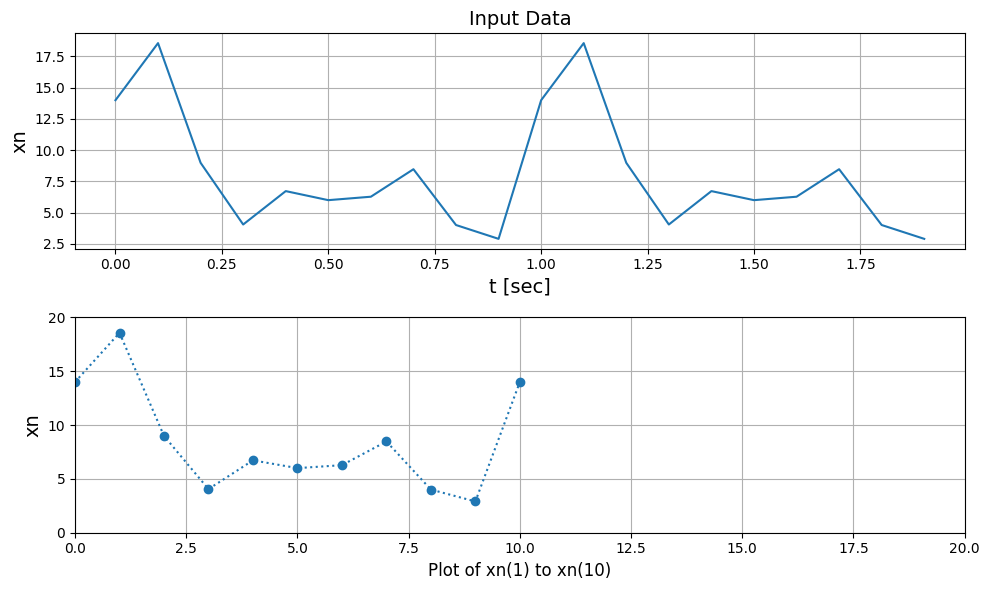

c1 (1Hz) = 3.0000-2.0000j
c3 (3Hz) = 1.0000-3.0000j
|c1| = 3.6056
|c3| = 3.1623
Angle of c1 = 0.5880
Angle of c3 = 1.2490


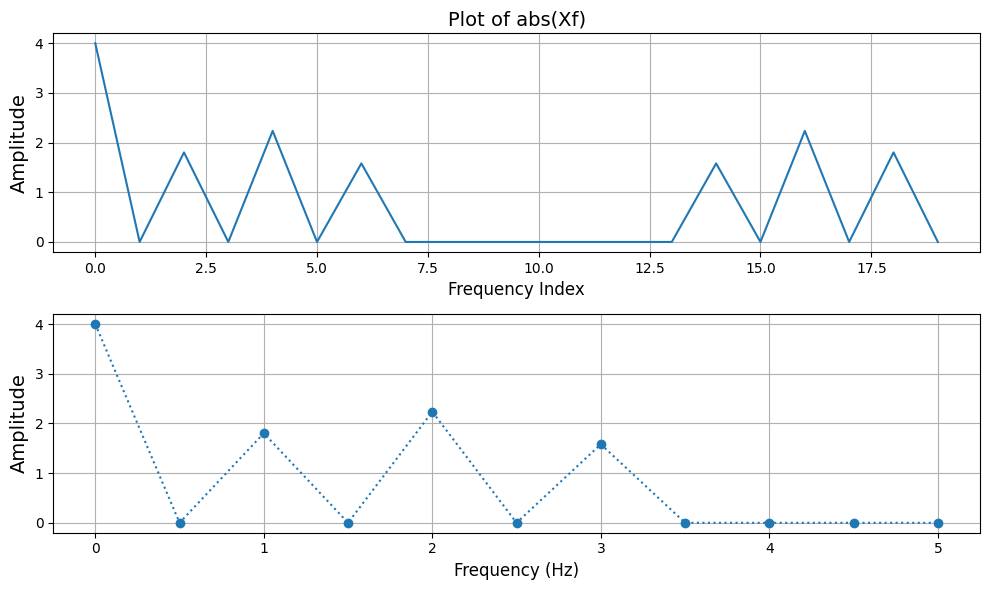

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# サンプリング周波数と時間ベクトルの設定
fs = 10
t = np.arange(0, 2, 1/fs)

# 信号の定義
w = 2 * np.pi
f = [1, 2, 3]
xn = 8 + 3 * np.cos(w * f[0] * t) + 2 * np.sin(w * f[0] * t) \
     + 2 * np.cos(w * f[1] * t) + 4 * np.sin(w * f[1] * t) \
     + 1 * np.cos(w * f[2] * t) + 3 * np.sin(w * f[2] * t)

# 信号のプロット
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, xn)
plt.grid()
plt.xlabel('t [sec]', fontsize=14)
plt.ylabel('xn', fontsize=14)
plt.title('Input Data', fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, 11), xn[:11], 'o:')
plt.grid()
plt.axis([0, 20, 0, 20])
plt.xlabel('Plot of xn(1) to xn(10)', fontsize=12)
plt.ylabel('xn', fontsize=14)

plt.tight_layout()
plt.show()

# 複素フーリエ級数の計算
n1 = 1  # 1Hzの周波数
c1 = np.sum(xn * np.exp(-1j * 2 * np.pi * n1 * t)) / fs  # 複素フーリエ級数計算

n3 = 3  # 3Hzの周波数
c3 = np.sum(xn * np.exp(-1j * 2 * np.pi * n3 * t)) / fs  # 複素フーリエ級数計算

# 結果の表示
print(f'c1 (1Hz) = {c1:.4f}')
print(f'c3 (3Hz) = {c3:.4f}')
print(f'|c1| = {np.abs(c1):.4f}')
print(f'|c3| = {np.abs(c3):.4f}')
print(f'Angle of c1 = {np.angle(np.conj(c1)):.4f}')
print(f'Angle of c3 = {np.angle(np.conj(c3)):.4f}')

# フーリエ変換を使用して周波数スペクトルを計算
n = len(xn)
px = np.fft.fft(xn) / n  # FFTによるフーリエ変換
px[0] /= 2  # ゼロ周波数成分の調整

# 振幅スペクトル
Amp = np.abs(px)

# ナイキスト周波数
nyquist = fs / 2
fq = np.arange(0, n//2 + 1) / (n / 2) * nyquist  # 正の周波数のみを使用

# 周波数スペクトルをプロット
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(Amp)
plt.grid()
plt.xlabel('Frequency Index', fontsize=12)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Plot of abs(Xf)', fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(fq, Amp[:len(fq)], 'o:')
plt.grid()
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Amplitude', fontsize=14)

plt.tight_layout()
plt.show()


#　複素数のフーリエ級数展開
## 解説
与えられた信号をプロットしたものが1番目の図で2番目の図は0~1秒の間の10サンプルをもとにプロットした図である．
c1とc3はそれぞれ1Hz,3Hzの周波数に対応する複素フーリエ級数を計算したもので，それに絶対値を取って振幅を表したものと位相角を表したものが続いている．
3番目の図は信号をfftし，正規化した後，絶対値をとった振幅スペクトルをプロットしたものである．4番目の図は特に正の周波数成分（前半部分）のみをプロットしたものである．